In [3]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Project path
ppath = sys.path[0] + '/../../'

In [ ]:
df = pd.read_csv(os.path.join(ppath, 'data', 'pima', 'diabetes.csv'))
df.head()

In [ ]:
df = pd.read_csv(os.path.join(ppath, 'data', 'pima', 'diabetes.csv'))
age_max = 60
df = df[df['Age'] != 0]
df = df[df['Age'] < age_max] 
col = "Age"

gap = 5
bins = [i for i in range(0, age_max+1, gap)]
labels = [f"{i}-{i+gap}" for i in range(0, age_max, gap)]

df[col + '.binned'] = pd.cut(df[col], bins=bins, labels=labels)
df['diabetes'] = df['Outcome']
df = df[[col + '.binned', 'diabetes']]
df = df.groupby(col + '.binned').mean()
df = df.reset_index()

# plot bar chart
plt.bar(df[col + '.binned'], df['diabetes'])
plt.ylabel('Percentage of diabetes', fontsize=18)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)
plt.show()

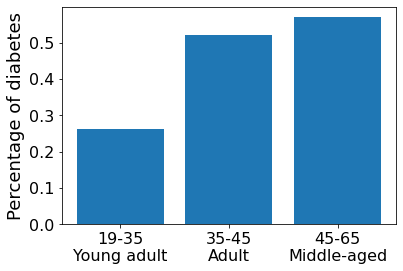

In [5]:
df = pd.read_csv(os.path.join(ppath, 'data', 'pima', 'diabetes.csv'))
age_max = 60
df = df[df['Age'] != 0]
df = df[df['Age'] < age_max] 
col = "Age"

bins = [0, 19, 35, 45, 65]
labels = ['0-18', '19-35\nYoung adult', '35-45\nAdult', '45-65\nMiddle-aged']
#labels[-1] = f"{age_max-gap}-{age_max}"

df[col + '.binned'] = pd.cut(df[col], bins=bins, labels=labels)
# calculate the percentage of diabetes for each bin
df['diabetes'] = df['Outcome']
df = df[[col + '.binned', 'diabetes']]
df = df.groupby(col + '.binned').mean()
df = df.reset_index()
# plot bar chart
plt.bar(df[col + '.binned'], df['diabetes'])
plt.ylabel('Percentage of diabetes', fontsize=18)
# rotate x-axis labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# save figure
plt.show()